# bivariate-experiment

Use the "Run" button to execute the code.

In [34]:
!pip install jovian --upgrade

Requirement already up-to-date: jovian in /opt/conda/lib/python3.8/site-packages (0.2.38)


In [35]:
import jovian

In [100]:
# Execute this to save new versions of the notebook
jovian.commit(project="bivariate-experiment")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "worldpower890/bivariate-experiment" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/worldpower890/bivariate-experiment


'https://jovian.ai/worldpower890/bivariate-experiment'

In [2]:
!ls

bivariate-experiment.ipynb  wine.data.txt  wine.names.txt  work


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [48]:
data = np.loadtxt('wine.data2.txt',delimiter=',')

In [49]:
data.shape

(178, 14)

In [50]:
np.random.seed(0)
perm = np.random.permutation(178)

In [51]:
trainx = data[perm[0:130],1:14]
trainy = data[perm[130:],0]
testx = data[perm[0:130],1:14]
testy = data[perm[130:],0]

In [52]:
trainx.shape
testx.shape
trainy.shape,testy.shape

((48,), (48,))

In [124]:
def generate_m_cov(f1,f2):
    m,cov = np.mean(trainx[:,(f1,f2)],axis=0),np.cov(trainx[:,(f1,f2)],rowvar=0,bias=1)
    return m,cov

generate_m_cov(2,5)

(array([2.33761538, 2.32461538]),
 array([[0.07439816, 0.02790947],
        [0.02790947, 0.40755716]]))

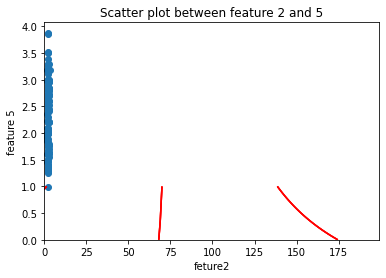

In [141]:
def bivariate_model(f1,f2):
    m,cov = generate_m_cov(f1,f2)
    #print(cov)
    val = []
    lower_val1 = np.min(trainx[:,f1])
    lower_val2 = np.min(trainx[:,f2])
    high_val1 = np.max(trainx[:,f1])
    high_val2 = np.max(trainx[:,f2])
   
    for i in range(len(trainx)):
        #print(i)
        val.append(multivariate_normal.pdf(trainx[:i,(f1,f2)],m,cov))
    #plt.xlim(lower_val1,high_val1)
    #plt.ylim(lower_val2,high_val2)
    plt.scatter(trainx[:,(2)],trainx[:,5])
    plt.title('Scatter plot between feature 2 and 5')
    plt.xlabel('feture2')
    plt.ylabel('feature 5')
    
     #----contours values -----
    
    x1g = np.linspace(lower_val1,high_val1,200)
    y1g = np.linspace(lower_val2,high_val2,200)
    z = [x1g,y1g]
    sign,det = np.linalg.slogdet(cov)
    for i in range(3):
        plt.contour(z,levels=2,colors='r')
    #print(z)
    
    #-------------------------
    return 

bivariate_model(2,5)

In [144]:
trainx[trainy == 1]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 130 but corresponding boolean dimension is 48